Consider a social network of friends/relatives, most of whom are closely connected. Visualize this as a graph where each vertex denotes a person, and if two people know each other there is an edge between the vertices denoting them. If persons x and y know each other directly, then there is an edge connecting x and y and level of connectivity between them is 1. If person x is a friend of person y and person y is friend of person z, but x is not a friend of z, then the level of connectivity between x and z is 2, and so on. The connectivity between people is always two way, i.e. if x directly knows y, then y also knows x directly.

Complete the Python function findConnectionLevel(n, Gmat, Px, Py) that takes 4 arguments, number of persons n (n persons numbered from 0 to n-1), Gmat an adjacency matrix representation of n persons and their connections(if Gmat [x] [y] = 1, then person x
and y are directly connected), two persons Px and Py both numbers, and returns the minimum level of connectivity between Px and Py. Return 0 if Px and Py are not connected through anybody in the group.

For example, for the graph below representing 7 persons from 0 to 6 and their connectivity.
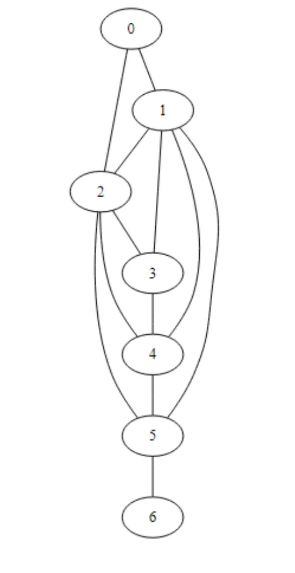

In [1]:
# Not passing private test cases

import numpy as np
def findConnectionLevel(n,Gmat,Px,Py):
    Gmat=np.array(Gmat)
    rows,cols=Gmat.shape

    #Initinalize visited array
    visited = np.zeros(cols, dtype=bool)

    #Initialize queue
    q=[]

    # Start from person Px
    q.append(Px)
    visited[Px] = True
    level = 0

    while len(q)!=0:
        j=q.pop(0)
        row=0
        for k in Gmat[j]:
            if not visited[row] and k==1:
                visited[row]=True
                q.append(row)
                if row==Py:
                    return level+1
            row+=1
        level+=1
    return 0


In [2]:
# Test Case

vertices = 7
Amat= [[0, 1, 1, 0, 0, 0, 0],
[1, 0, 1, 1, 1,1, 0],
[1, 1, 0, 1, 1, 1, 0],
[0, 1, 1, 0, 1,0, 0],
[0, 1, 1, 1, 0, 1, 0],
[0, 1, 1, 0, 1, 0,1],
[0, 0, 0, 0, 0, 1, 0]]
personX = 6
personY = 0

print(findConnectionLevel(vertices, Amat, personX, personY))

# Output: 3


3


# Copilot Solution

**Issues**:
- Level Tracking: The level variable is incremented after processing each node, but it should be incremented after processing all nodes at the current level.
- Queue Management: You need to track the number of nodes at the current level to correctly increment the level variable.

In [3]:
import numpy as np

def findConnectionLevel(n, Gmat, Px, Py):
    Gmat = np.array(Gmat)
    rows, cols = Gmat.shape
    
    # Initialize visited array
    visited = np.zeros(cols, dtype=bool)
    
    # Initialize queue
    q = []
    
    # Start from person Px
    q.append(Px)
    visited[Px] = True
    level = 0
    
    while q:
        # Number of nodes at the current level
        level_size = len(q)
        
        for _ in range(level_size):
            j = q.pop(0)
            row = 0
            for k in Gmat[j]:
                if not visited[row] and k == 1:
                    visited[row] = True
                    q.append(row)
                    if row == Py:
                        return level + 1
                row += 1
        level += 1
    
    return 0
